In [1]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Not much useful
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#read the dataset
adv = pd.read_csv('advertising.csv')

In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.shape ## Rows , columns

(200, 4)

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns

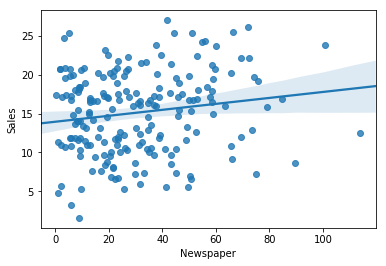

In [10]:
sns.regplot(x='Newspaper',y='Sales',data=adv)

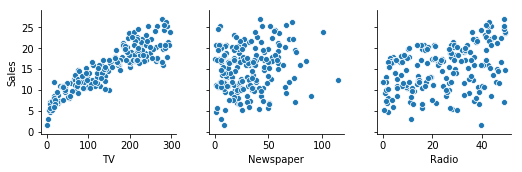

In [32]:
sns.pairplot(data=adv,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'])

In [33]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


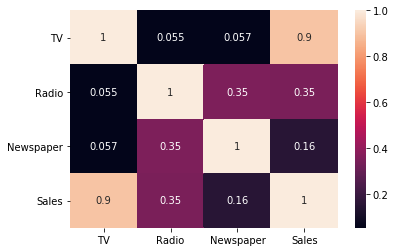

In [35]:
sns.heatmap(adv.corr(),annot=True)

In [117]:
X=adv['Newspaper']
y=adv['Sales']

In [118]:
# train - test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
X_train.head()

74     13.1
3      58.5
185    19.6
26     12.6
90      9.3
Name: Newspaper, dtype: float64

In [120]:
## First let us lear about the stats model

X_train_sm= sm.add_constant(X_train)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [121]:
X_train_sm.head()

,const,Newspaper
74,1.0,13.1
3,1.0,58.5
185,1.0,19.6
26,1.0,12.6
90,1.0,9.3


In [122]:
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()

In [123]:
lr_model.params

const        13.132714
Newspaper     0.059574
dtype: float64

In [124]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Fri, 23 Aug 2019   Prob (F-statistic):            0.00423
Time:                        00:06:15   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.000      11.566      14.699
Newspaper      0.0596      0.020      2.909      0.004       0.019       0.100
==============================================================================
Omnibus:                        9.229   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.890
Skew:                          -0.073   Prob(JB):                        0.143
Kurtosis:                       2.196   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

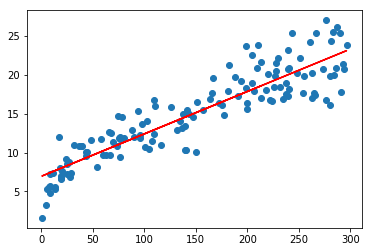

In [64]:
y_train_predict=6.9487+0.0545*X_train

plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_predict,'r')
plt.show()

In [57]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [59]:
# error (residual)= y_train - y_train_predict

y_train_predict=lr_model.predict(X_train_sm)

In [63]:
y_train_predict.head()

74     18.57900
3      15.20545
185    18.12120
26     14.73675
90     14.26805
Name: TV, dtype: float64

In [66]:
res=y_train-y_train_predict ##errro

Text(0.5, 1.0, 'Residual plot')

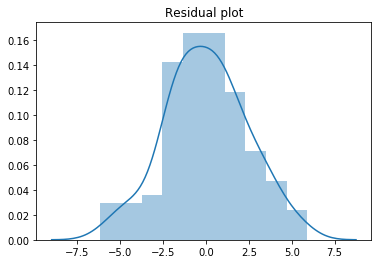

In [70]:
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

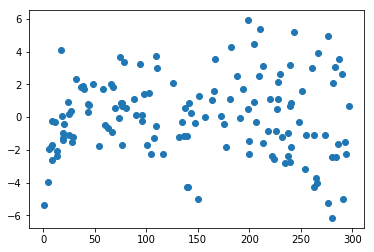

In [72]:
plt.scatter(X_train,res)

##Look for paterns in residuals(We shold not find any patterns)

In [74]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
r2=r2_score(y_true=y_train, y_pred=y_train_predict)

In [83]:
r2=r2_score(y_true=y_test, y_pred=y_test_pred)

In [84]:
r2

0.7921031601245658

In [85]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

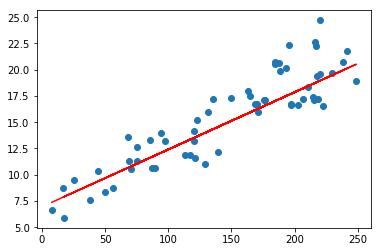

In [87]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

In [88]:
###Build using SKlearn

In [89]:
# train - test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [94]:
## create an Liner regression model
lm = LinearRegression()
##Fit the model
lm.fit(X_train,y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [99]:
X_train_lm.shape

(140, 1)

In [101]:
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
help(lm)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, 

In [103]:
lm.coef_

array([0.05454575])

In [104]:
lm.intercept_

6.948683200001357

In [105]:
y_train_pred=lm.predict(X_train_lm)

In [107]:
y_test_pred=lm.predict(X_test_lm)

In [108]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7921031601245662

In [125]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7921031601245662

## Multiple linear regression

In [184]:
import warnings
warnings.filterwarnings('ignore')

# ETL Packages
import numpy as np
import pandas as pd


# Lm Packages
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

#Visaulization packages
import matplotlib.pyplot as plt
import seaborn as sns



In [127]:
housing = pd.read_csv('Housing.csv')

In [128]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [130]:
housing.shape

(545, 13)

In [131]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [132]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


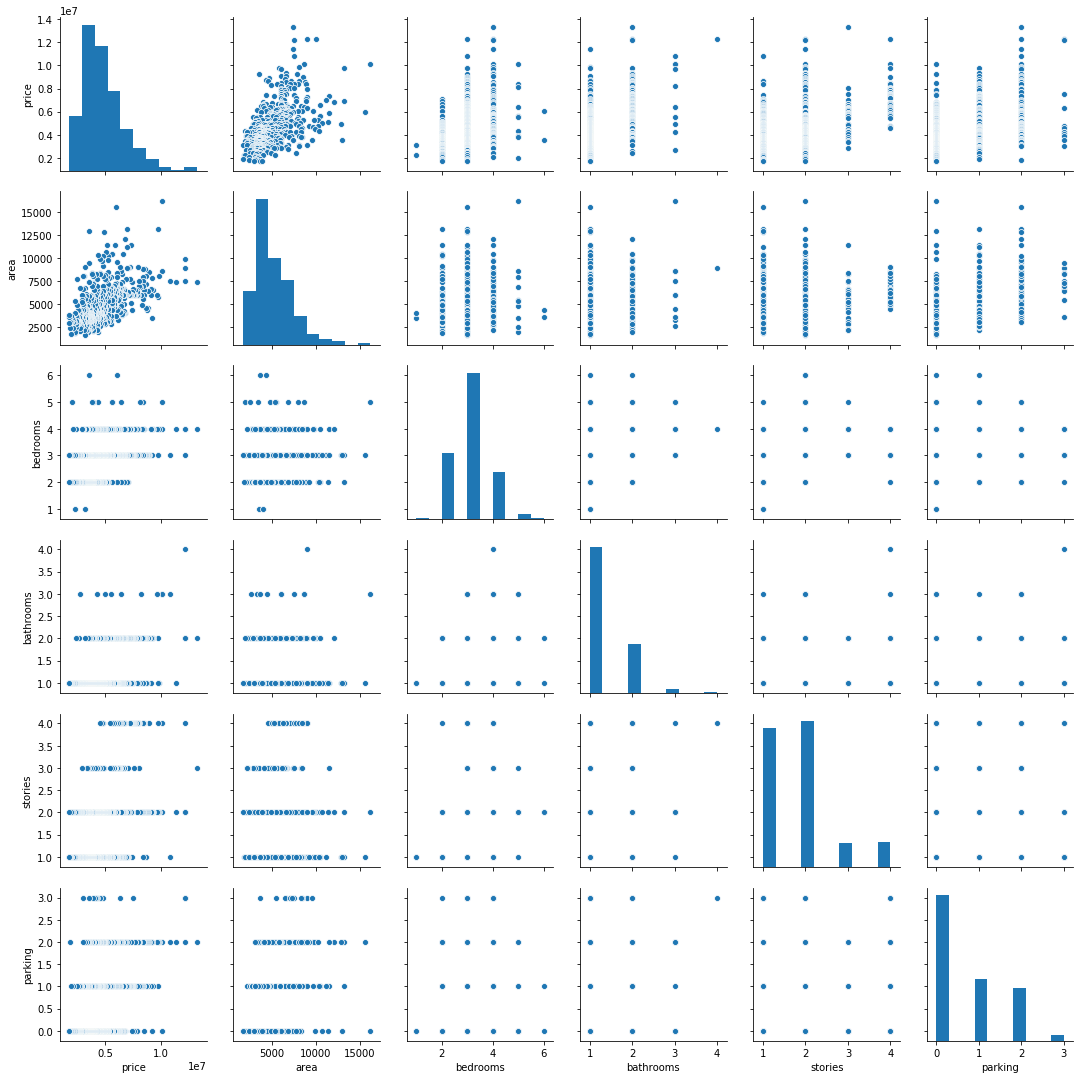

In [133]:
###Visualize -Pair plot (For numeric variables)

sns.pairplot(data=housing)

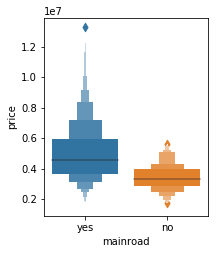

In [144]:
## Visualize the Categorical variables

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxenplot(x='mainroad',y='price',data=housing)


<Figure size 720x576 with 0 Axes>

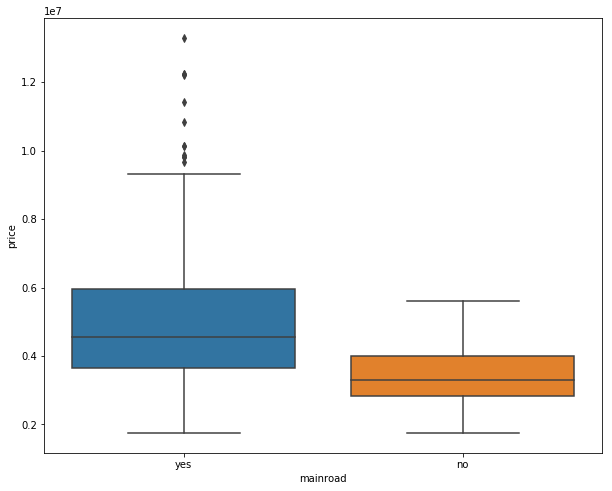

<Figure size 720x576 with 0 Axes>

In [142]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=housing)
plt.figure(figsize=(10,8))

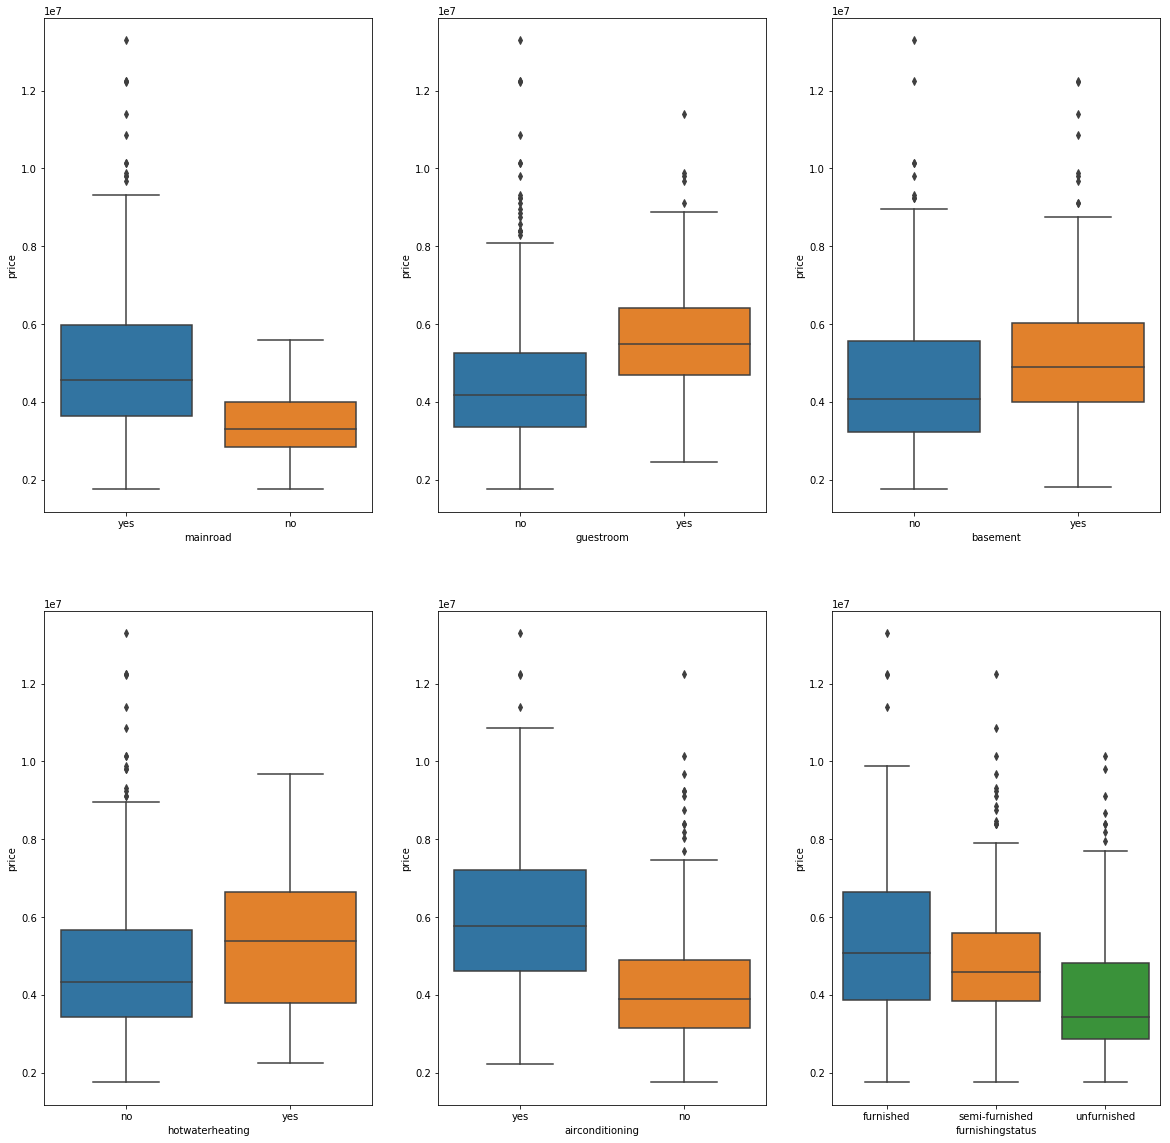

In [149]:
plt.figure(figsize=(20, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

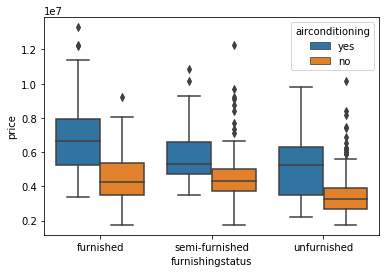

In [151]:
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing,hue='airconditioning')

## Data preparatin step

In [152]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [154]:
housings.mairoad.value_counts()

housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [161]:
housing[varlist]=housing[varlist].apply(lambda x : x.map({'yes':1,'no':0}))

In [162]:
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [163]:
housing.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [529]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status.head()

KeyError: 'furnishingstatus'

In [170]:
#Concat the dummy variables

housing=pd.concat([housing,status],axis=1)

## Axis=1; horizontal concat

In [171]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [173]:
housing=housing.drop('furnishingstatus',axis=1)

In [176]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Split into train and test data

In [331]:
# WE can split the entire dataframes into train and test datasets by using the train_test_split method of sklearn



df_train,df_test=train_test_split(housing,train_size=0.7,random_state=100)
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [317]:
df_train.shape

(381, 14)

In [318]:
df_test.shape

(164, 14)

In [332]:
#### Normalization and standardization techniques to helps to rescale the coeffiencts

# 1. create an object

scaler=MinMaxScaler()

# Rescale only the numeric variables and not the Yes/No variables since we know it has only 0 and 1

num_variables=['area','bedrooms','bathrooms','stories','parking','price']
df_train[num_variables]

#fit - gets the xmin and xman  -- use only for the train
# transform - computes x-xmin/xmax-xmin   - Use only for the test dataset
#fit_transform - Does both fit and transform

df_train[num_variables]=scaler.fit_transform(df_train[num_variables])

In [333]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [195]:
df_train[num_variables].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.242345,0.260333
std,0.181420,0.147336,0.237325,0.295001,0.285933,0.157607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,0.000000,0.151515
50%,0.234424,0.400000,0.000000,0.333333,0.000000,0.221212
75%,0.398099,0.400000,0.500000,0.333333,0.333333,0.345455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

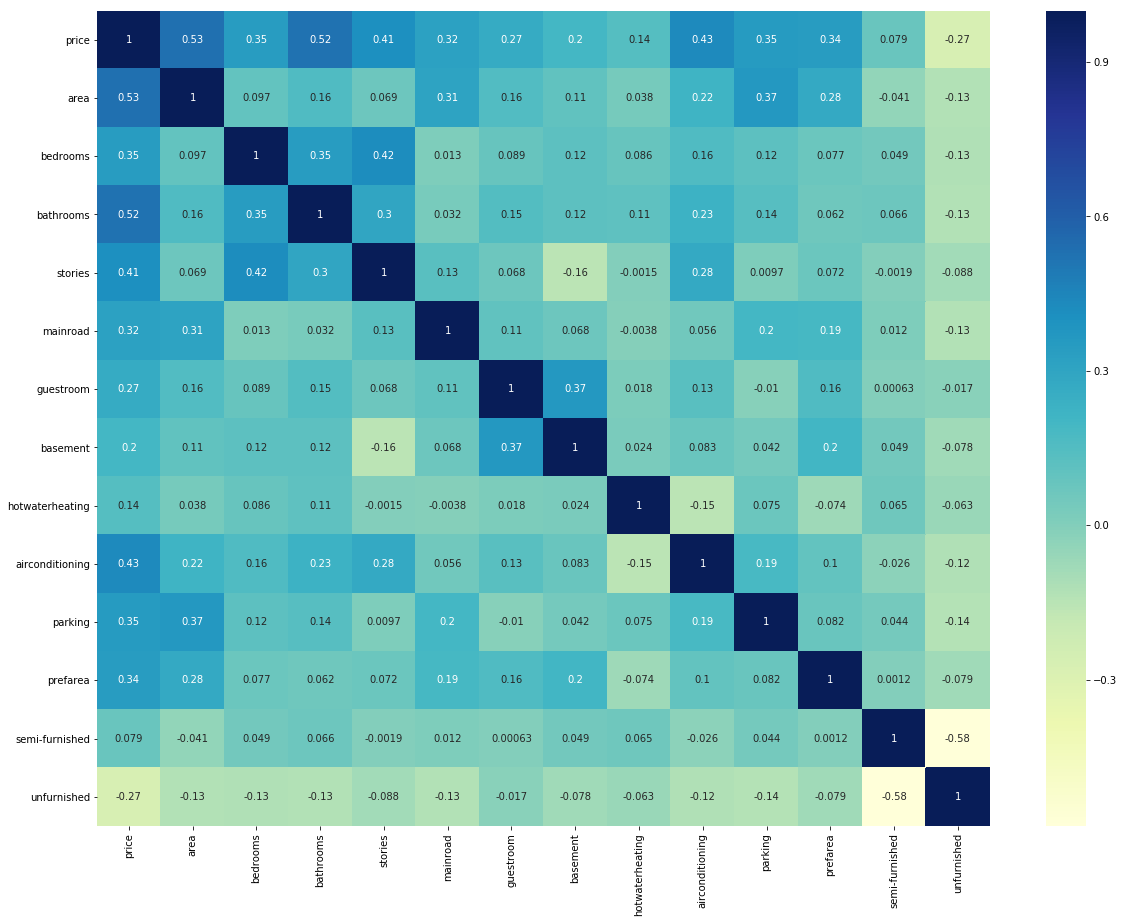

In [206]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

In [208]:
# Let us add one variable first and then add other variables

#First let us create X_train,y_train

y_train=df_train.pop('price')
X_train=df_train

In [226]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [211]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [212]:
# stat significance of variables
# if the variable it multicollinear looking into the VIF (Variance inflatiaon factor)

In [216]:
### LEt us do the model with STats Model 

X_train_sm=sm.add_constant(X_train['area'])

In [217]:
X_train_sm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [218]:
### Create the First model 
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [219]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.15e-29
Time:                        12:12:41   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
# Add another variables
X_train_sm=sm.add_constant(X_train[['area','bathrooms']])

In [231]:
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [235]:
lr=sm.OLS(y_train,X_train_sm)  # Ordinary Least square method
lr_model=lr.fit()
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [233]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.51e-54
Time:                        12:18:56   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
# Add another variables
X_train_sm=sm.add_constant(X_train[['area','bathrooms','bedrooms']])
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.12e-57
Time:                        12:21:07   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## second approach of adding all the variables and removing the variables which is not significant

In [236]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [237]:


X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.83e-83
Time:                        12:35:58   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
## Significance of variable (based on P- Values)
## VIF

## Use both to decide which variable to drop

In [240]:
## VIF = 1/(1-Rsq) (Use the package)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


# Ignore columns with 

- High P value, high VIF (remove)
- High - Low:
     - High P value, low VIF (Remove first)
     - High VIf , low P - value ( remove next)
- low p , low vif (Dont remove)

In [261]:
X=X_train.drop('semi-furnished',axis=1)

In [246]:
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.07e-83
Time:                        12:52:11   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [263]:
X=X.drop('bedrooms',axis=1)


In [264]:
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.73e-84
Time:                        12:57:55   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [267]:
y_train_pred=lr_model.predict(X_train_sm)

In [268]:
res=y_train-y_train_pred

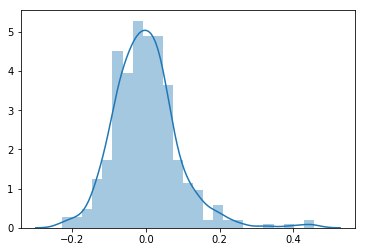

In [269]:
sns.distplot(res)

In [272]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [334]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
#df_train.head()
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [335]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [336]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [338]:
y_test=df_test.pop('price')
X_test=df_test

KeyError: 'price'

In [325]:
df_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [345]:
X_test_sm=sm.add_constant(X_test)

In [346]:
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [347]:
X_test_sm=X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [348]:
##Predict

y_test_pred = lr_model.predict(X_test_sm)

In [349]:
r2=r2_score(y_true=y_train, y_pred=y_train_pred)

In [350]:
r2

0.6800930630265903

In [351]:
r2=r2_score(y_true=y_test, y_pred=y_test_pred)

In [352]:
r2

0.6713505684480789

## Using RFE and Sklearn method

In [353]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [354]:
y_train = df_train.pop('price')
X_train = df_train

In [355]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [361]:
lm=LinearRegression()

lm.fit(X_train,y_train)

rfe=RFE(lm,10) # 10 - Number of variables 
rfe=ref.fit(X_train,y_train)

In [362]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [365]:
col=X_train.columns[ref.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [367]:
X_train.columns[~ref.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

## build the model based on the RFE suggested columns

In [389]:
X_train_rfe=X_train[col]

In [390]:
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [391]:
lr_rfe=sm.OLS(y_train,X_train_rfe).fit()
lr_rfe.params
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.28e-82
Time:                        14:44:21   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [399]:
X_train_new = X_train_rfe.drop(["bedrooms"], axis = 1)

In [400]:
lr_rfe=sm.OLS(y_train,X_train_new).fit()
lr_rfe.params
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.67e-83
Time:                        14:46:58   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [401]:
X_train_new = X_train_new.drop(["const"], axis = 1)

vif = pd.DataFrame()
X=X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [385]:
X_train_new.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.5,0.333333,1,0,1,0,0.666667,0


In [403]:
X_train_lm = sm.add_constant(X_train_new)
y_train_price=lr_rfe.predict(X_train_lm)

In [404]:
res=y_train-y_train_price

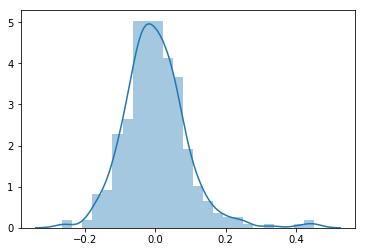

In [405]:
sns.distplot(res)

## Making predictions

In [406]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [407]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [408]:
y_test = df_test.pop('price')
X_test = df_test

In [409]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [412]:
# Making predictions
y_pred = lr_rfe.predict(X_test_new)

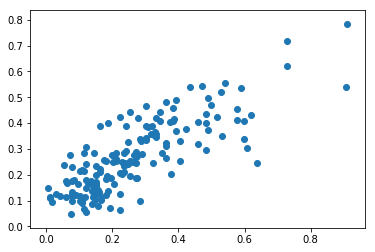

In [414]:
plt.scatter(y_test,y_pred)

### Industry - Linear regression

In [447]:
le = preprocessing.LabelEncoder()

In [438]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [439]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [440]:
le.transform(["tokyo", "tokyo", "paris","amsterdam","amsterdam"]) 

array([2, 2, 1, 0, 0])

In [445]:
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [467]:
df['BMI_group']=df['bmi'].apply(lambda x : 'Underweight' if x < 18.5 else 'Normal' if (x >=18.5 and x <= 24.9 ) else  "Overweight" if (x >= 25.0 and x <= 29.9)  else "Obese"  )

In [475]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/831JKKEkW7kqd5M4evNva9LyB/insurance_grouped.csv")
le = LabelEncoder()#use this encoder to encode values


df=df.fillna('ZaN')
le.fit(df['BMI_group'])
df['BMI_group']=le.transform(df['BMI_group']) 

le.fit(df['smoker'])
df['smoker']=le.transform(df['smoker']) 

le.fit(df['region'])
df['region']=le.transform(df['region']) 

le.fit(df['sex'])
df['sex']=le.transform(df['sex']) 
print(df.head(5))

   age  sex     bmi  children  smoker  region      charges  BMI_group
0   19    0  27.900         0       1       3  16884.92400          2
1   18    1  33.770         1       0       2   1725.55230          1
2   28    1  33.000         3       0       2   4449.46200          1
3   33    1  22.705         0       0       1  21984.47061          0
4   32    1  28.880         0       0       1   3866.85520          2


In [481]:
print(round(df.smoker.corr(df.bmi), 4))

print("%.4f" % round(df.smoker.corr(df.charges), 4))

0.0038
0.7873


In [479]:
"%.2f" % round(2606.89579999999, 2)

'2606.90'

In [482]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns

In [484]:
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/72Boxj99702g8BwK5powGz1g0/insurance_training.csv")

# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/gxVjwe1k3YEogYK23O8PPnXod/insurance_test.csv")

# Linear regression
#import required libraries

# Write the output
#THESE TWO LINES SHOULD NOT BE EDITED
#test["predicted_charges"]=y_test_pred
#test.to_csv("/code/output/predictions.csv")

In [485]:
train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [491]:
X_train=train['smoker']
y_train=train['charges']

In [492]:
X_train_sm=sm.add_constant(X_train)

In [493]:
X_train_sm.head()

,const,smoker
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [494]:
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()

In [495]:
lr_model.params

const      8578.322548
smoker    23188.685871
dtype: float64

In [496]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1660.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):          1.04e-219
Time:                        11:34:43   Log-Likelihood:                -11068.
No. Observations:                1070   AIC:                         2.214e+04
Df Residuals:                    1068   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8578.3225    258.076     33.240      0.000    8071.929    9084.716
smoker      2.319e+04    569.152     40.743      0.000    2.21e+04    2.43e+04
==============================================================================
Omnibus:                      104.764   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.078
Skew:                           0.719   Prob(JB):                     1.28e-34
Kurtosis:                       4.198   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [497]:
y_train_pred=lr_model.predict(X_train_sm)


In [498]:
res=y_train-y_train_pred

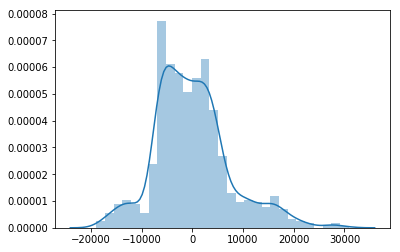

In [499]:
sns.distplot(res)

In [522]:
test.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
0,764,45,0,25.175,2,0,0,3
1,887,36,0,30.020,0,0,1,2
2,890,64,0,26.885,0,1,1,3
3,1293,46,1,25.745,3,0,1,3
4,259,19,1,31.920,0,1,1,2


In [521]:
X_train=test[['smoker','age','sex','bmi','children','region','BMI_group']]
X_train_sm=sm.add_constant(X_train)
y_train=test[['charges']]
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()

KeyError: "None of [Index(['charges'], dtype='object')] are in the [columns]"

In [503]:
X_test_sm=sm.add_constant(X_test)

In [504]:
y_test_pred=lr_model.predict(X_test_sm)

In [507]:
r2=r2_score(y_true=y_t, y_pred=y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]

In [508]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age', 'bedrooms', 'bathrooms', 'stories', 'parking','charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

0     8578.322548
1     8578.322548
2    31767.008419
3     8578.322548
4    31767.008419
dtype: float64

In [509]:
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/QNdMORzykKkG4L3WQ17Xx53o3/insurance_training.csv")

# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/Mq5p8YpQoz3KbWJRE4Mey1Yoq/insurance_test.csv")


In [510]:
train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [511]:
X_train_sm=sm.add_constant(train)

In [515]:
lr=sm.OLS(train['charges'],X_train_sm) 
lr_model=lr.fit()

In [516]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.587e+32
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:07:06   Log-Likelihood:                 25808.
No. Observations:                1070   AIC:                        -5.160e+04
Df Residuals:                    1060   BIC:                        -5.155e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.276e-12   1.73e-12      4.202      0.000    3.88e-12    1.07e-11
Unnamed: 0 -1.302e-14   6.47e-16    -20.121      0.000   -1.43e-14   -1.17e-14
age        -6.395e-14   2.08e-14     -3.080      0.002   -1.05e-13   -2.32e-14
sex         1.421e-12      5e-13      2.844      0.005     4.4e-13     2.4e-12
bmi        -3.553e-14   4.44e-14     -0.801      0.423   -1.23e-13    5.15e-14
children    5.684e-14   2.06e-13      0.276      0.783   -3.48e-13    4.61e-13
smoker              0   1.15e-12          0      1.000   -2.25e-12    2.25e-12
region      1.137e-13   2.27e-13      0.501      0.616   -3.31e-13    5.59e-13
BMI_group   9.095e-13   3.46e-13      2.625      0.009     2.3e-13    1.59e-12
charges        1.0000   4.08e-17   2.45e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       59.524   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.185
Skew:                          -0.610   Prob(JB):                     1.56e-15
Kurtosis:                       3.208   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [526]:
X_train=train[['smoker','age','sex','bmi','children','region','BMI_group']]
X_train_sm=sm.add_constant(X_train)
y_train=train[['charges']]
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit()
X_test=test[['smoker','age','sex','bmi','children','region','BMI_group']]
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)

In [528]:
lr_model.params

const       -11182.540907
smoker       23626.261189
age            257.191857
sex            -11.239113
bmi            338.386710
children       423.915966
region        -269.780250
BMI_group     -400.741058
dtype: float64

In [525]:
test.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
0,764,45,0,25.175,2,0,0,3
1,887,36,0,30.020,0,0,1,2
2,890,64,0,26.885,0,1,1,3
3,1293,46,1,25.745,3,0,1,3
4,259,19,1,31.920,0,1,1,2
